<a href="https://colab.research.google.com/github/lenkalapellypraveen/DataScience_Classification_Usecases/blob/dev/DataScience_UseCase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Method: Logistic Regression (Linear Method)**

**Logistic Regression Challenge: Loan Default Prediction**

In this challenge, you need to build a binary classification model from scratch that predicts whether a customer will default on a loan (1 = default, 0 = no default). The model should use three key financial indicators:

a) Income (annual income of the customer).\
b) Debt (total outstanding debt).\
c) Credit score (numerical credit rating).

You need to implement the core logistic regression algorithm without using sklearn's LogisticRegression class. This tests your understanding of:

a) The mathematical foundations of logistic regression.\
b) The sigmoid function and its role in converting linear predictions to probabilities.\
c) Implementation of gradient descent for optimization.\
d) Parameter (weights and bias) initialization and updating.

In [ ]:
###### IMPLEMENTATION ######

**1. Data preparation:**

Generate or load customer financial data.\
Split into training and testing sets.\
Standardize features (important for gradient descent convergence)

In [31]:
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
N_samples = 1000
income = np.random.normal(50000, 15000, N_samples)
debt = np.random.normal(15000, 5000, N_samples)
credit_score = np.random.normal(700, 100, N_samples)

In [32]:
# Create relationship for default
# I have randomly chosen theta values
np.random.seed(42)
z = -2 + 3e-5 * income - 1e-4 * debt + 5e-3 * credit_score
prob = 1 / (1 + np.exp(-z))
default = np.random.binomial(1, prob)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create DataFrame
customer_data = pd.DataFrame({
    'income': income,
    'debt': debt,
    'credit_score': credit_score,
    'default': default
})

# Split into training and testing sets
X = customer_data[['income', 'debt', 'credit_score']]
y = customer_data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Scale the data
scaler = StandardScaler()

# Fit the Scaler (Calculate Statistics - Finding Mean and Standard deviation)
# scaler.fit(X_train)

# Transform the Data (Apply Scaling - standardization (z = x-Mu/std))
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)    Or

# Fit and Transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Question:** Why using the same statistics (mean and standard deviation) from the training data to scale the test data is crucial?

Solution:

a) Simulation of real-world deployment: When your model is deployed in production, you won't have access to the statistics of future data. You'll only have the statistics from your historical (training) data. By using training statistics to transform test data, you're simulating how your model will perform in the real world.

b) Consistency in data representation: Your model learns patterns based on the scaled training data. If you use different scaling parameters for test data, the features would be represented differently, and your model might not recognize the patterns it learned during training.

c) Prevention of data leakage: Data leakage occurs when information from outside your training dataset is used to create your model. If you calculated statistics from your test set, you'd be incorporating information that shouldn't be available during the training phase.

**2. Sigmoid Function**

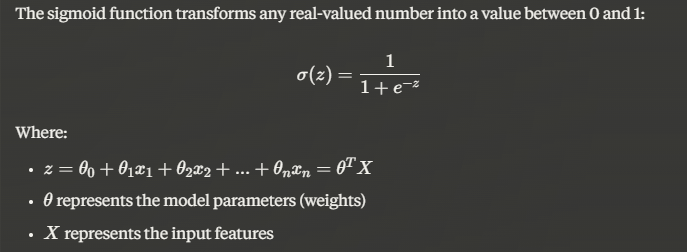

**3. Cost function:**

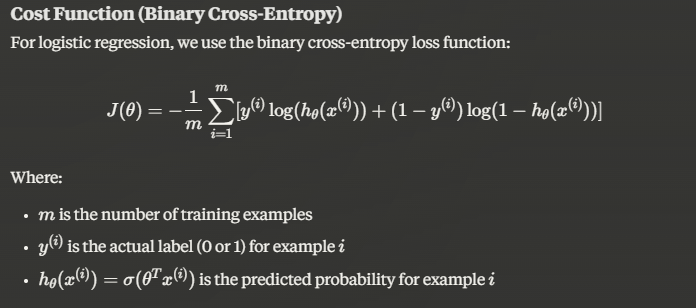

**4. Gradient descent:**

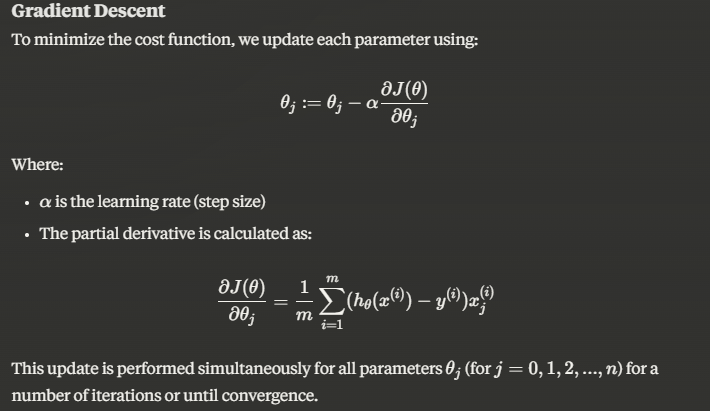

In [34]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1+ np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            z = self.bias + np.dot(X, self.weights)
            y_pred = self.sigmoid(z)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X, threshold = 0.5):
        z = self.bias + np.dot(X, self.weights)
        y_pred = self.sigmoid(z)
        return (y_pred >= threshold).astype(int)

# Model Training
model = LogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train_scaled, y_train)

**5. Prediction and evaluation:**

In [36]:
from sklearn.metrics import accuracy_score, classification_report
# Default Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
# Accuracy = Number of correct predictions / Total number of predictions
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}\n')
print(f'classification_report : \n{classification_report(y_test, y_pred)}')

Accuracy : 84.0

classification_report : 
              precision    recall  f1-score   support

           0       0.60      0.09      0.16        33
           1       0.85      0.99      0.91       167

    accuracy                           0.84       200
   macro avg       0.72      0.54      0.53       200
weighted avg       0.81      0.84      0.79       200

